In [1]:
import numpy as np
import matplotlib.pyplot as plt
from free_pdf import *

%matplotlib notebook

Read in simulated PDF

In [2]:
r_sim,gr_sim = read_index_data_smart('MnO_gr_300.dat')

Convert into S(Q)-1 (called just S(Q) here)

In [3]:
q,sq = make_sq_from_gr(r_sim,gr_sim*gauss(r_sim,100,0),qmax=30,qmin=.2)
sq = my_first_convolution_gauss(q,sq,.02) #smooth a bit

using default Nyquist delq 0.010471975511965976


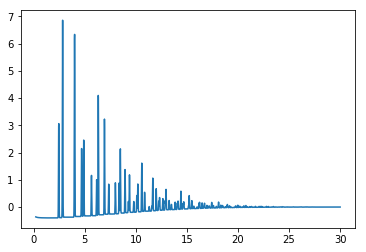

In [4]:
plt.figure()
plt.plot(q,sq)

Define the 'ideal' pattern from this.

In [5]:
r, gr_ideal = make_gr_from_sq(q, sq, rmax=30)

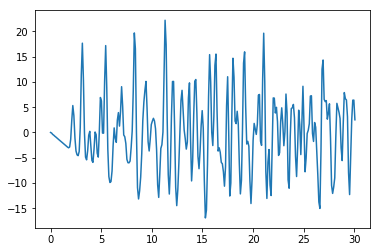

In [6]:
plt.figure()
plt.plot(r, gr_ideal)

Now say you want to add some noise which increases with q.  To emphasize the effects, the noise is quite high here.

In [7]:
sq_noisy = (sq+.01*q*(np.random.random(len(q))-.5))

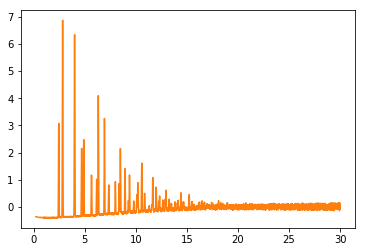

In [8]:
plt.figure()
plt.plot(q,sq_noisy,color='C1')


Making a pdf from this will, unsurprisingly, make a noisy PDF.

In [9]:
r, gr_noisy = make_gr_from_sq(q, sq_noisy, rmax=30)

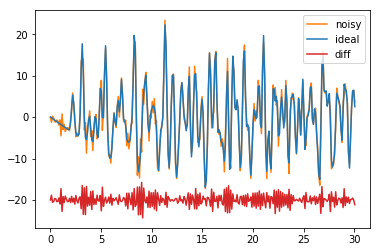

In [10]:
plt.figure()
plt.plot(r,gr_noisy,c='C1',label='noisy')
plt.plot(r,gr_ideal,c='C0',label='ideal')
plt.plot(r,gr_ideal-gr_noisy-20,c='C3',label='diff')
plt.legend(loc=1)

As it dampens signal at high-q, the Lorch function is one way of reducing the effects of noise.

In [11]:
def lorch_func(q,sq,qmax):
    delta = np.pi/qmax
    return sq*np.nan_to_num(np.sin(q*delta)/(q*delta))

In [12]:
sq_lorch = lorch_func(q,sq_noisy,30)


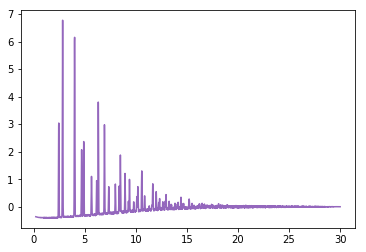

In [13]:
plt.figure()
plt.plot(q,sq_lorch,color='C4')


In [14]:
r, gr_lorch = make_gr_from_sq(q,sq_lorch,rmax=30)


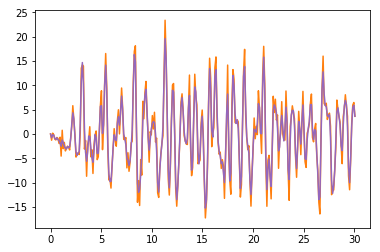

In [15]:
plt.figure()
plt.plot(r,gr_noisy,color='C1')
plt.plot(r,gr_lorch,color='C4')
